# Land Cover dynamics

This notebook performs a multi-temporal geospatial analysis of land cover changes across the departments of Arauca, Casanare, and Meta.

### Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Land cover changes between 2000 and 2022

Load level 2 land cover datasets

In [2]:
# Folder containing the files
covers_path = "./data/cover/coverl2" 

# List all files in the folder
files = [f for f in os.listdir(covers_path)]

lc = {}

# Loop through each file to read it
for file in files:
    path = os.path.join(covers_path, file)
    gdf = gpd.read_file(path)
    lc[file] = gdf

In [3]:
# Assign a 'year' attribute to each GeoDataFrame based on its filename
for filename, data in lc.items():
    if "2000" in filename:
        data['year'] = 2000
    elif "2010" in filename:
        data['year'] = 2010
    elif "2022" in filename:
        data['year'] = 2022

### Data consolidation and spatial aggregation by department

In [4]:
# Combine yearly datasets into a single GeoDataFrame for each department
ara=pd.concat([lc['ara_cover2000l2.gpkg'], lc['ara_cover2010l2.gpkg'], lc['ara_cover2022l2.gpkg']], ignore_index=True)
casa=pd.concat([lc['casa_cover2000l2.gpkg'], lc['casa_cover2010l2.gpkg'], lc['casa_cover2022l2.gpkg']], ignore_index=True)
meta=pd.concat([lc['meta_cover2000l2.gpkg'], lc['meta_cover2010l2.gpkg'], lc['meta_cover2022l2.gpkg']], ignore_index=True)

# Calculate the area for each polygon in square kilometers (km²)
ara["Area"] = ara.geometry.area / 1e6
casa["Area"] = casa.geometry.area / 1e6
meta["Area"] = meta.geometry.area / 1e6

# Filter out polygons classified as "Unknown" (clouds or missing data)
ara_noclouds = ara[ara["level2"] != "9.9 Unknown"]
casa_noclouds = casa[casa["level2"] != "9.9 Unknown"]
meta_noclouds = meta[meta["level2"] != "9.9 Unknown"]

# Aggregate polygons by class and year, then update areas to reflect the merged geometries
# Arauca
ara_level2_year = ara_noclouds.dissolve(by=['level2', 'year'], as_index=False)
ara_level2_year['Area'] = ara_level2_year.geometry.area / 1e6
ara_level2_year = ara_level2_year[['level2', 'year', 'Area', 'geometry']]
# Casanare
casa_level2_year = casa_noclouds.dissolve(by=['level2', 'year'], as_index=False)
casa_level2_year['Area'] = casa_level2_year.geometry.area / 1e6
casa_level2_year = casa_level2_year[['level2', 'year', 'Area', 'geometry']]
#Meta
meta_level2_year = meta_noclouds.dissolve(by=['level2', 'year'], as_index=False)
meta_level2_year['Area'] = meta_level2_year.geometry.area / 1e6
meta_level2_year = meta_level2_year[['level2', 'year', 'Area', 'geometry']]


### Land cover area by class and year

Arauca

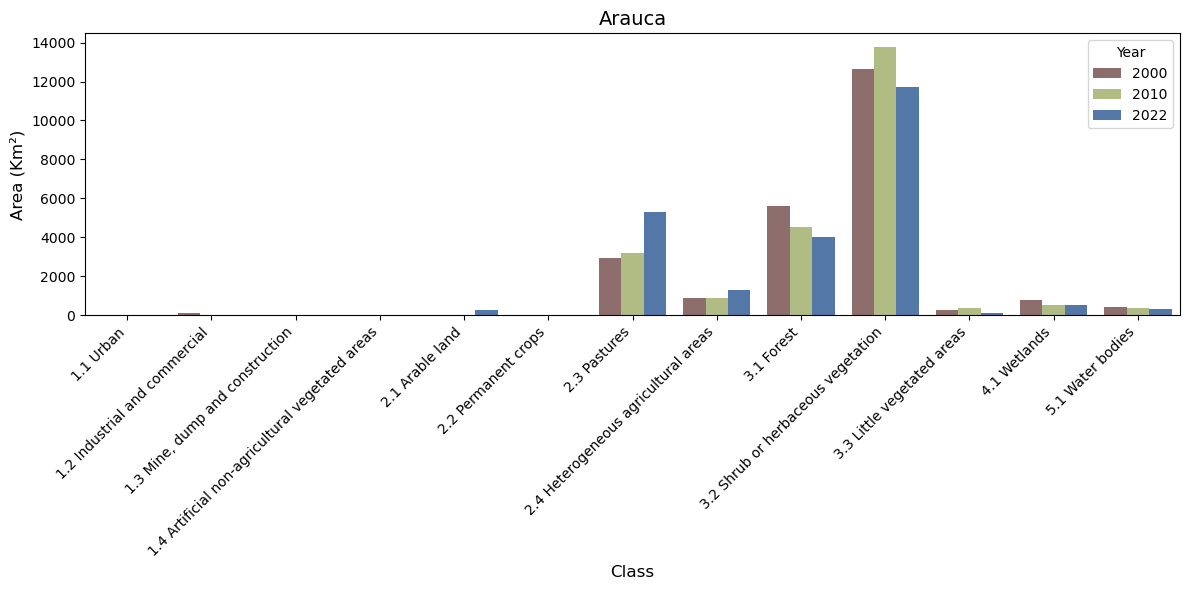

In [5]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ara_level2_year ,
    x="level2",
    y="Area",
    hue="year",
    palette=["#946966", "#b6c57b", "#4575b4"],
    errorbar=None,
    order=sorted(ara_level2_year["level2"].unique())
)

# Style the plot
plt.title("Arauca", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Area (Km²)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.tight_layout()
plt.show()

Casanare

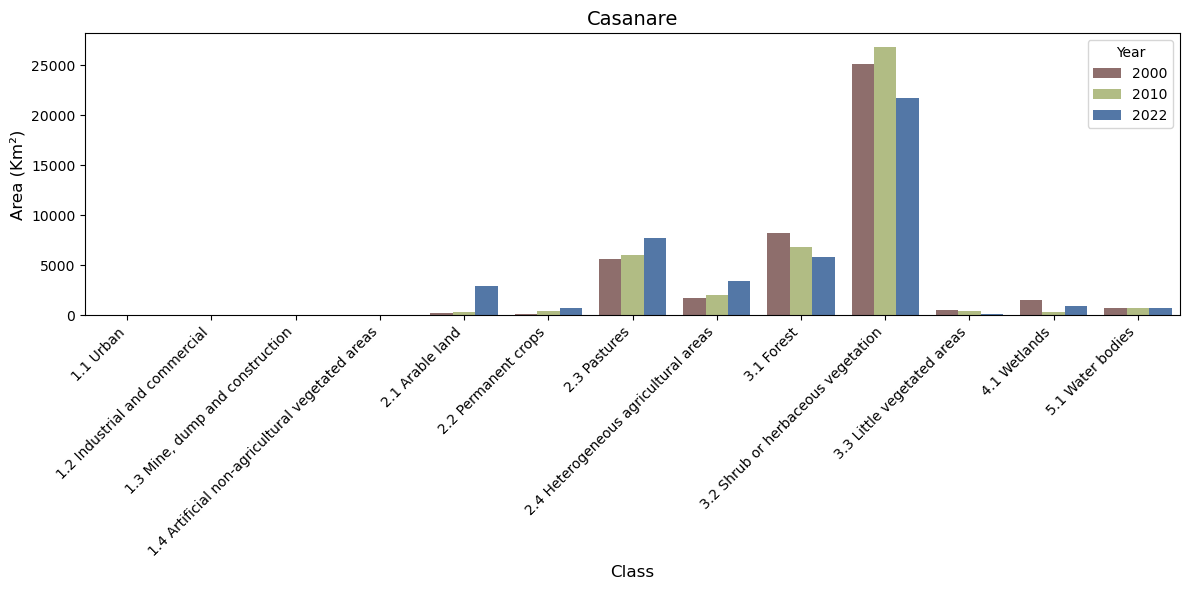

In [6]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=casa_level2_year,
    x="level2",
    y="Area",
    hue="year",
    palette=["#946966", "#b6c57b", "#4575b4"],
    errorbar=None,
    order=sorted(casa_level2_year["level2"].unique())
)

# Style the plot
plt.title("Casanare", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Area (Km²)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.tight_layout()
plt.show()

Meta

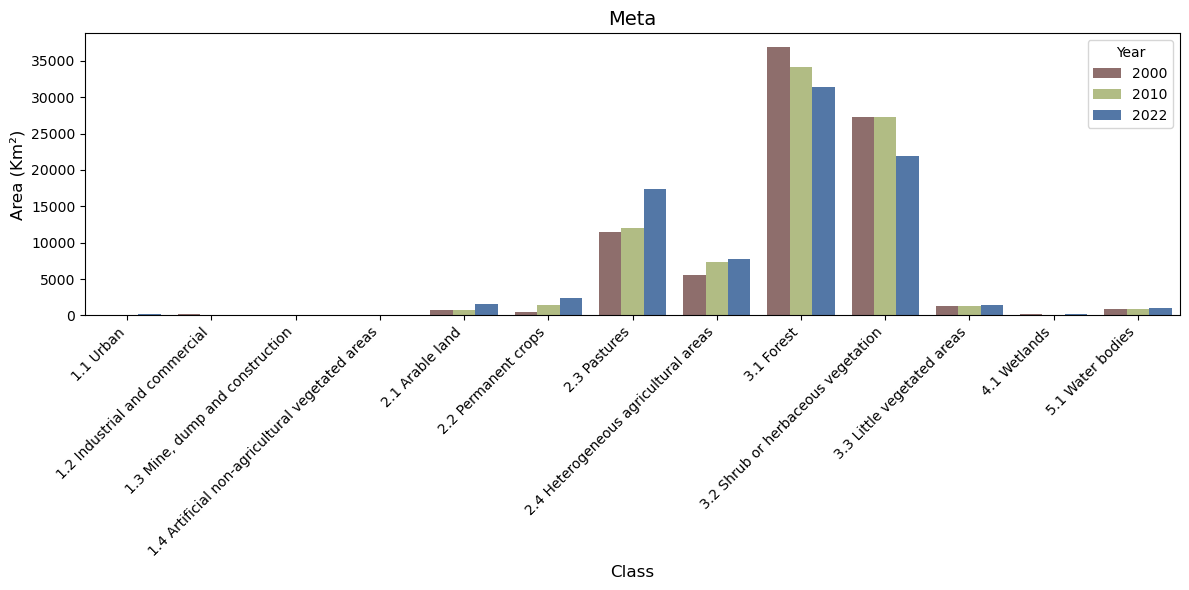

In [7]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=meta_level2_year,
    x="level2",
    y="Area",
    hue="year",
    palette=["#946966", "#b6c57b", "#4575b4"],
    errorbar=None,
    order=sorted(meta_level2_year["level2"].unique())
)

# Style the plot
plt.title("Meta", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Area (Km²)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.tight_layout()
plt.show()

All departments

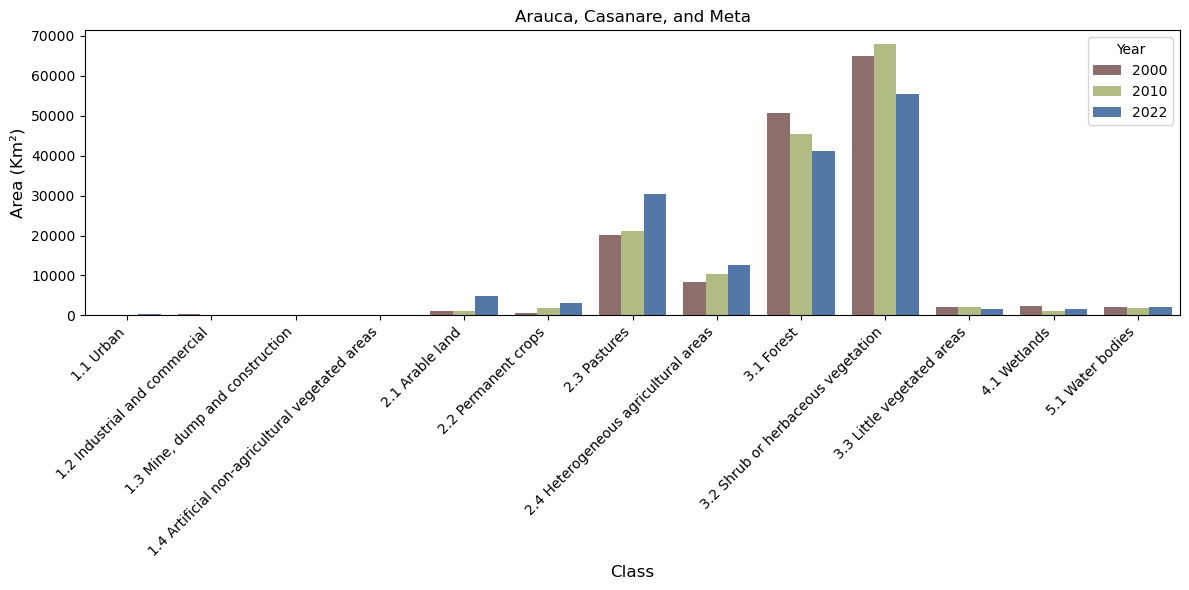

In [8]:
# Merge
lc_2000 = pd.concat([lc['ara_cover2000l2.gpkg'], lc['casa_cover2000l2.gpkg'], lc['meta_cover2000l2.gpkg']], ignore_index=True)
lc_2010 = pd.concat([lc['ara_cover2010l2.gpkg'], lc['casa_cover2010l2.gpkg'], lc['meta_cover2010l2.gpkg']], ignore_index=True)
lc_2022 = pd.concat([lc['ara_cover2022l2.gpkg'], lc['casa_cover2022l2.gpkg'], lc['meta_cover2022l2.gpkg']], ignore_index=True)

# Calculate area in square kilometers and aggregate by 'level2'
lc_2000["Area"] = lc_2000.geometry.area / 1e6
lc_2000_area = lc_2000.groupby("level2")["Area"].sum().reset_index()
lc_2010["Area"] = lc_2010.geometry.area / 1e6
lc_2010_area = lc_2010.groupby("level2")["Area"].sum().reset_index()
lc_2022["Area"] = lc_2022.geometry.area / 1e6
lc_2022_area = lc_2022.groupby("level2")["Area"].sum().reset_index()

# Add 'Year' column to each dataframe
lc_2000_area["Year"] = 2000
lc_2010_area["Year"] = 2010
lc_2022_area["Year"] = 2022

# Combine all years into one dataframe
lc_all = pd.concat([lc_2000_area, lc_2010_area, lc_2022_area], ignore_index=True)

lc_all_noclouds = lc_all[lc_all["level2"] != "9.9 Unknown"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=lc_all_noclouds,
    x="level2",
    y="Area",
    hue="Year",
    palette=["#946966", "#b6c57b", "#4575b4"] 
)

# Style the plot
plt.xlabel("Class", fontsize=12)
plt.ylabel("Area (Km²)", fontsize=12)
plt.title("Arauca, Casanare, and Meta")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.tight_layout()
plt.show()

### Net change of land cover classes

#### Split the aggregated department data into separate DataFrames by year

In [9]:
# Arauca
ara_2000=ara_level2_year[ara_level2_year["year"]==2000]
ara_2010=ara_level2_year[ara_level2_year["year"]==2010]
ara_2022=ara_level2_year[ara_level2_year["year"]==2022]
#Casanare
casa_2000=casa_level2_year[casa_level2_year["year"]==2000]
casa_2010=casa_level2_year[casa_level2_year["year"]==2010]
casa_2022=casa_level2_year[casa_level2_year["year"]==2022]
# Meta
meta_2000=meta_level2_year[meta_level2_year["year"]==2000]
meta_2010=meta_level2_year[meta_level2_year["year"]==2010]
meta_2022=meta_level2_year[meta_level2_year["year"]==2022]

#### Merge datasets from 2000 and 2022 to calculate area differences and display the net gain or loss for each land cover class

Arauca

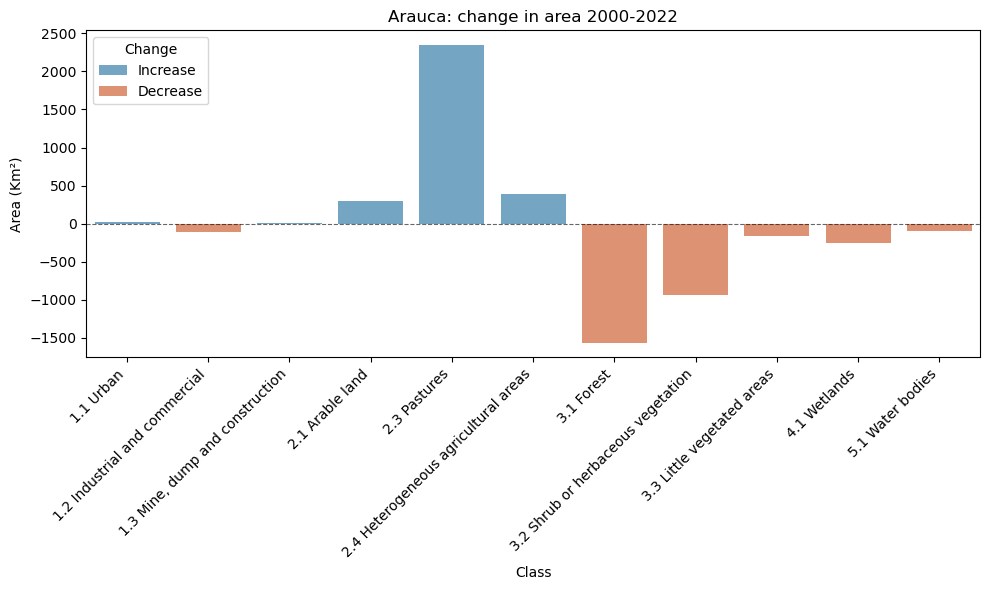

In [10]:
# Merge
ara_2000_2022 = pd.merge(ara_2000, ara_2022, on="level2", suffixes=('_2000', '_2022'))
ara_2000_2022["diff"] = ara_2000_2022["Area_2022"] - ara_2000_2022["Area_2000"]
ara_2000_2022["Change"] = ara_2000_2022["diff"].apply(lambda x: "Increase" if x > 0 else "Decrease")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ara_2000_2022,
            x="level2", 
            y="diff", 
            hue="Change", 
            palette=["#67a9cf", "#ef8a62"], 
            dodge=False,
            errorbar=None,
            order=sorted(ara_2000_2022["level2"].unique()))
plt.axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Area (Km²)")
plt.title("Arauca: change in area 2000-2022")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Change", loc="upper left")
plt.tight_layout()

Casanare

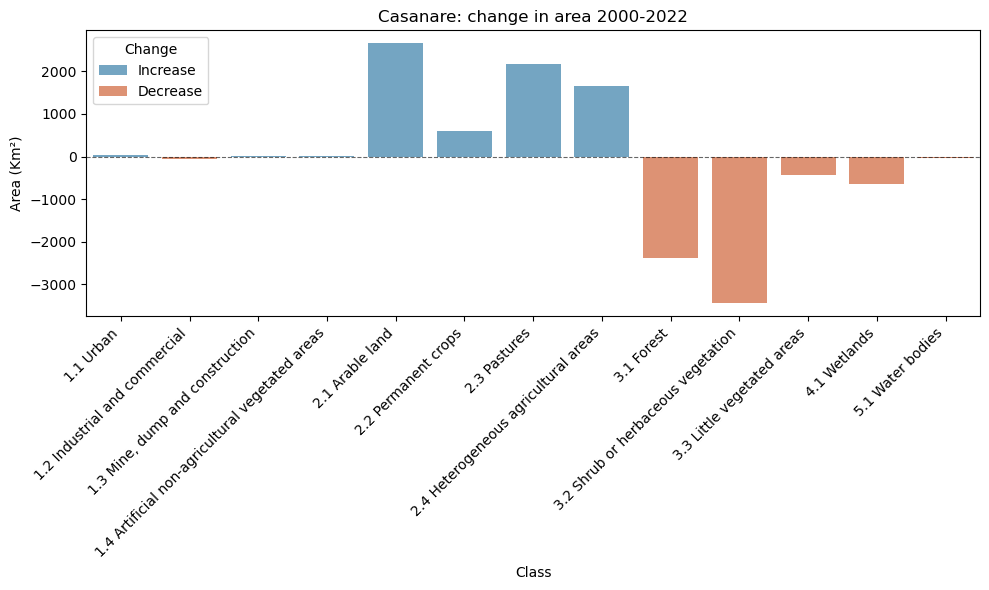

In [12]:
# Merge
casa_2000_2022 = pd.merge(casa_2000, casa_2022, on="level2", suffixes=('_2000', '_2022'))
casa_2000_2022["diff"] = casa_2000_2022["Area_2022"] - casa_2000_2022["Area_2000"]
casa_2000_2022["Change"] = casa_2000_2022["diff"].apply(lambda x: "Increase" if x > 0 else "Decrease")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=casa_2000_2022,
            x="level2", 
            y="diff", 
            hue="Change", 
            palette=["#67a9cf", "#ef8a62"], 
            dodge=False,
            errorbar=None,
            order=sorted(casa_2000_2022["level2"].unique()))
plt.axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Area (Km²)")
plt.title("Casanare: change in area 2000-2022")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Change", loc="upper left")
plt.tight_layout()

Meta

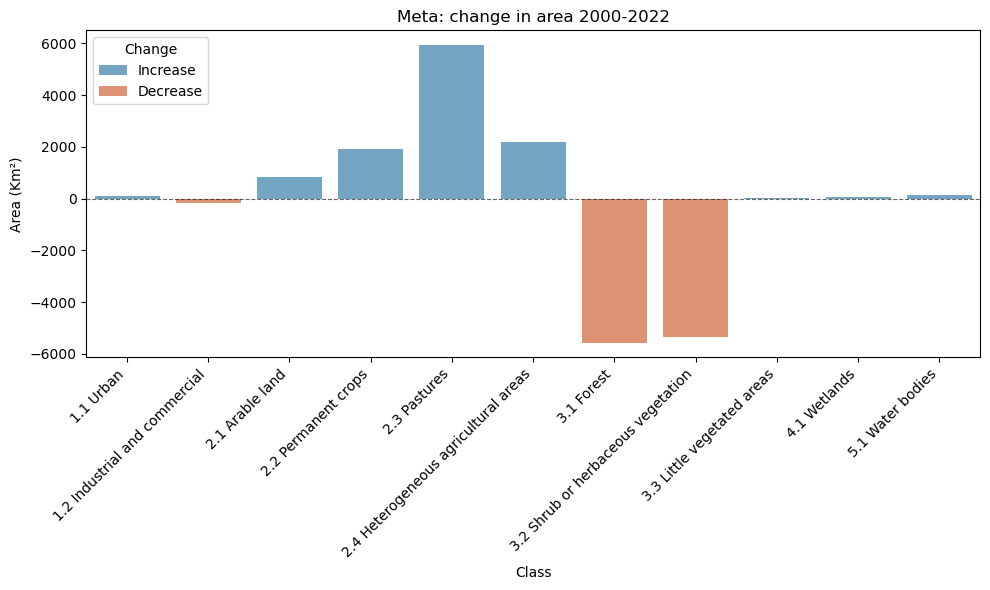

In [13]:
# Merge
meta_2000_2022 = pd.merge(meta_2000, meta_2022, on="level2", suffixes=('_2000', '_2022'))
meta_2000_2022["diff"] = meta_2000_2022["Area_2022"] - meta_2000_2022["Area_2000"]
meta_2000_2022["Change"] = meta_2000_2022["diff"].apply(lambda x: "Increase" if x > 0 else "Decrease")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=meta_2000_2022,
            x="level2", 
            y="diff", 
            hue="Change", 
            palette=["#67a9cf", "#ef8a62"], 
            dodge=False,
            errorbar=None,
            order=sorted(meta_2000_2022["level2"].unique()))
plt.axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Area (Km²)")
plt.title("Meta: change in area 2000-2022")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Change", loc="upper left")
plt.tight_layout()

All departments

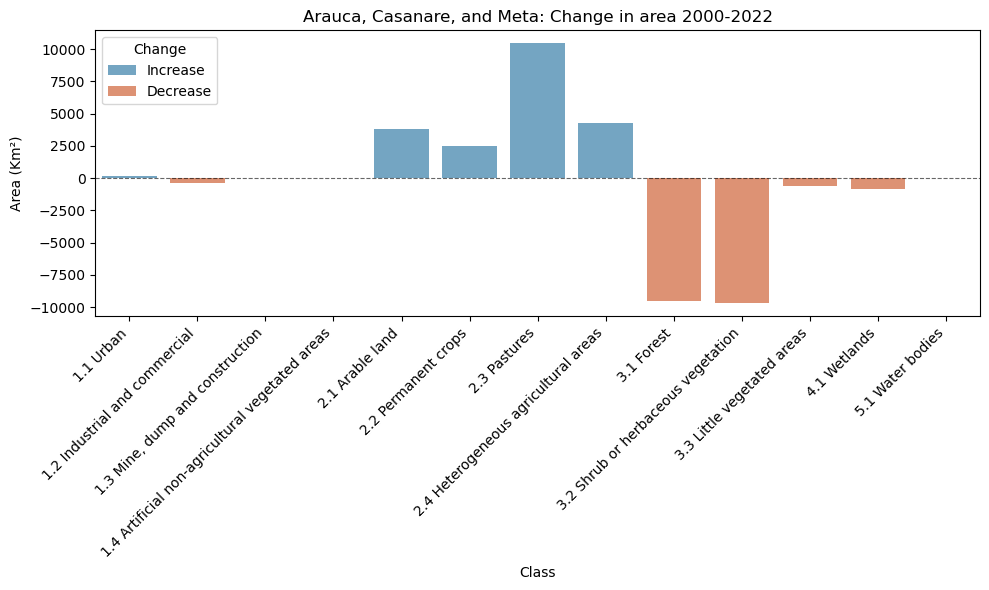

In [14]:
# Merge
lc_2000_2022 = pd.merge(lc_2000_area, lc_2022_area, on="level2", suffixes=('_2000', '_2022'))
lc_2000_2022 = lc_2000_2022[lc_2000_2022["level2"] != "9.9 Unknown"]
lc_2000_2022["diff"] = lc_2000_2022["Area_2022"] - lc_2000_2022["Area_2000"]
lc_2000_2022["Change"] = lc_2000_2022["diff"].apply(lambda x: "Increase" if x > 0 else "Decrease")  

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="level2", y="diff", data=lc_2000_2022, hue="Change", palette=["#67a9cf", "#ef8a62"], dodge=False)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Area (Km²)")
plt.title("Arauca, Casanare, and Meta: Change in area 2000-2022")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Change", loc="upper left")
plt.tight_layout()

### Sankey plots

Arauca

In [ ]:
inter=gpd.overlay(ara_2000,ara_2022,how='intersection')
if inter.crs.is_geographic:
    inter = inter.to_crs(epsg=9377)
inter['area']=inter.geometry.area/1e6

c:\Users\VICTUS\anaconda3\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

`keep_geom_type=True` in overlay resulted in 60463 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries



In [ ]:
inter = inter.rename(columns={'level2_1': 'Date1','level2_2':'Date2'})

label_set = set()
links = []

def add_links(inter, col_from, col_to):
    temp = inter.groupby([col_from, col_to])["area"].sum().reset_index()
    for _, row in temp.iterrows():
        source = f"{col_from}_{row[col_from]}"
        target = f"{col_to}_{row[col_to]}"
        value = row["area"]
        label_set.update([source, target])
        links.append((source, target, value))

add_links(inter, "Date1", "Date2")

labels = list(label_set)
label_to_index = {label: i for i, label in enumerate(labels)}

source = [label_to_index[s] for s, t, v in links]
target = [label_to_index[t] for s, t, v in links]
value = [v for s, t, v in links]

color_dict = {
    "1.1 Urban": "#FD0000",
    "1.2 Industrial and commercial": "#B26E69",
    "1.3 Mine, dump and construction": "#4a4a4a",
    "1.4 Artificial non-agricultural vegetated areas": "#00CCBB",
    "2.1 Arable land": "#ffeb12",
    "2.2 Permanent crops": "#ED66C0",
    "2.3 Pastures": "#b3cd57",
    "2.4 Heterogeneous agricultural areas": "#CAB03E",
    "3.1 Forest": "#3a6a00",
    "3.2 Shrub or herbaceous vegetation": "#5f4d29",
    "3.3 Little vegetated areas": "#bfc5b9",
    "4.1 Wetlands": "#7faed5",
    "5.1 Water bodies": "#0127ff",
    "9.9 Unknown": "#FBF1F1"
}

display_labels = [label.split("_", 1)[1] for label in labels]

colors = []
for label in labels:
    class_name = label.split("_", 1)[1].strip()
    colors.append(color_dict.get(class_name, "gray"))

def hex_to_rgba(hex_color, alpha=0.6):
    hex_color = hex_color.lstrip("#")
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return f"rgba({r},{g},{b},{alpha})"

missing_classes = set()
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    if class_name not in color_dict:
        missing_classes.add(class_name)

link_colors = []
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    hex_color = color_dict.get(class_name, "#999999")
    link_colors.append(hex_to_rgba(hex_color))

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=display_labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Sankey plot 2000 and 2022 - Arauca",
    font_size=18,
    height=900
)

Casanare

In [ ]:
inter=gpd.overlay(casa_2000,casa_2022,how='intersection')
if inter.crs.is_geographic:
    inter = inter.to_crs(epsg=9377)
inter['area']=inter.geometry.area/1e6

c:\Users\VICTUS\anaconda3\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

`keep_geom_type=True` in overlay resulted in 155776 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries



In [ ]:
inter = inter.rename(columns={'level2_1': 'Date1','level2_2':'Date2'})

label_set = set()
links = []

def add_links(inter, col_from, col_to):
    temp = inter.groupby([col_from, col_to])["area"].sum().reset_index()
    for _, row in temp.iterrows():
        source = f"{col_from}_{row[col_from]}"
        target = f"{col_to}_{row[col_to]}"
        value = row["area"]
        label_set.update([source, target])
        links.append((source, target, value))

add_links(inter, "Date1", "Date2")

labels = list(label_set)
labels = sorted(label_set, key=lambda x: x.split("_", 1)[1])
label_to_index = {label: i for i, label in enumerate(labels)}

source = [label_to_index[s] for s, t, v in links]
target = [label_to_index[t] for s, t, v in links]
value = [v for s, t, v in links]

color_dict = {
    "1.1 Urban": "#FD0000",
    "1.2 Industrial and commercial": "#B26E69",
    "1.3 Mine, dump and construction": "#4a4a4a",
    "1.4 Artificial non-agricultural vegetated areas": "#00CCBB",
    "2.1 Arable land": "#ffeb12",
    "2.2 Permanent crops": "#ED66C0",
    "2.3 Pastures": "#b3cd57",
    "2.4 Heterogeneous agricultural areas": "#CAB03E",
    "3.1 Forest": "#3a6a00",
    "3.2 Shrub or herbaceous vegetation": "#5f4d29",
    "3.3 Little vegetated areas": "#bfc5b9",
    "4.1 Wetlands": "#7faed5",
    "5.1 Water bodies": "#0127ff",
    "9.9 Unknown": "#FBF1F1"
}

display_labels = [label.split("_", 1)[1] for label in labels]

colors = []
for label in labels:
    class_name = label.split("_", 1)[1].strip()
    colors.append(color_dict.get(class_name, "gray"))

def hex_to_rgba(hex_color, alpha=0.6):
    hex_color = hex_color.lstrip("#")
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return f"rgba({r},{g},{b},{alpha})"

missing_classes = set()
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    if class_name not in color_dict:
        missing_classes.add(class_name)

link_colors = []
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    hex_color = color_dict.get(class_name, "#999999")
    link_colors.append(hex_to_rgba(hex_color))

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=display_labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Sankey plot 2000 and 2022 - Casanare",
    font_size=18,
    height=900
)

Meta

In [15]:
inter=gpd.overlay(meta_2000,meta_2022,how='intersection')
if inter.crs.is_geographic:
    inter = inter.to_crs(epsg=9377)
inter['area']=inter.geometry.area/1e6

c:\Users\VICTUS\anaconda3\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 778469 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  """Entry point for launching an IPython kernel.


In [18]:
inter = inter.rename(columns={'level2_1': 'Date1','level2_2':'Date2'})

label_set = set()
links = []

def add_links(inter, col_from, col_to):
    temp = inter.groupby([col_from, col_to])["area"].sum().reset_index()
    for _, row in temp.iterrows():
        source = f"{col_from}_{row[col_from]}"
        target = f"{col_to}_{row[col_to]}"
        value = row["area"]
        label_set.update([source, target])
        links.append((source, target, value))

add_links(inter, "Date1", "Date2")

labels = list(label_set)
labels = sorted(label_set, key=lambda x: x.split("_", 1)[1])
label_to_index = {label: i for i, label in enumerate(labels)}

source = [label_to_index[s] for s, t, v in links]
target = [label_to_index[t] for s, t, v in links]
value = [v for s, t, v in links]

color_dict = {
    "1.1 Urban": "#FD0000",
    "1.2 Industrial and commercial": "#B26E69",
    "1.3 Mine, dump and construction": "#4a4a4a",
    "1.4 Artificial non-agricultural vegetated areas": "#00CCBB",
    "2.1 Arable land": "#ffeb12",
    "2.2 Permanent crops": "#ED66C0",
    "2.3 Pastures": "#b3cd57",
    "2.4 Heterogeneous agricultural areas": "#CAB03E",
    "3.1 Forest": "#3a6a00",
    "3.2 Shrub or herbaceous vegetation": "#5f4d29",
    "3.3 Little vegetated areas": "#bfc5b9",
    "4.1 Wetlands": "#7faed5",
    "5.1 Water bodies": "#0127ff",
    "9.9 Unknown": "#FBF1F1"
}

display_labels = [label.split("_", 1)[1] for label in labels]

colors = []
for label in labels:
    class_name = label.split("_", 1)[1].strip()
    colors.append(color_dict.get(class_name, "gray"))

def hex_to_rgba(hex_color, alpha=0.6):
    hex_color = hex_color.lstrip("#")
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return f"rgba({r},{g},{b},{alpha})"

missing_classes = set()
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    if class_name not in color_dict:
        missing_classes.add(class_name)

link_colors = []
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    hex_color = color_dict.get(class_name, "#999999")
    link_colors.append(hex_to_rgba(hex_color))


fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=display_labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Sankey plot 2000 and 2022 - Meta",
    font_size=18,
    height=900
)

All departments

In [ ]:
inter=gpd.overlay(lc_2000,lc_2022,how='intersection')
if inter.crs.is_geographic:
    inter = inter.to_crs(epsg=9377)
inter['area']=inter.geometry.area/1e6

c:\Users\VICTUS\anaconda3\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

`keep_geom_type=True` in overlay resulted in 366662 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries



In [138]:
inter = inter.rename(columns={'level2_1': 'Date1','level2_2':'Date2'})

label_set = set()
links = []

def add_links(inter, col_from, col_to):
    temp = inter.groupby([col_from, col_to])["area"].sum().reset_index()
    for _, row in temp.iterrows():
        source = f"{col_from}_{row[col_from]}"
        target = f"{col_to}_{row[col_to]}"
        value = row["area"]
        label_set.update([source, target])
        links.append((source, target, value))

add_links(inter, "Date1", "Date2")

labels = list(label_set)
labels = sorted(label_set, key=lambda x: x.split("_", 1)[1])
label_to_index = {label: i for i, label in enumerate(labels)}

source = [label_to_index[s] for s, t, v in links]
target = [label_to_index[t] for s, t, v in links]
value = [v for s, t, v in links]

color_dict = {
    "1.1 Urban": "#FD0000",
    "1.2 Industrial and commercial": "#B26E69",
    "1.3 Mine, dump and construction": "#4a4a4a",
    "1.4 Artificial non-agricultural vegetated areas": "#00CCBB",
    "2.1 Arable land": "#ffeb12",
    "2.2 Permanent crops": "#ED66C0",
    "2.3 Pastures": "#b3cd57",
    "2.4 Heterogeneous agricultural areas": "#CAB03E",
    "3.1 Forest": "#3a6a00",
    "3.2 Shrub or herbaceous vegetation": "#5f4d29",
    "3.3 Little vegetated areas": "#bfc5b9",
    "4.1 Wetlands": "#7faed5",
    "5.1 Water bodies": "#0127ff",
    "9.9 Unknown": "#FBF1F1"
}

display_labels = [label.split("_", 1)[1] for label in labels]

colors = []
for label in labels:
    class_name = label.split("_", 1)[1].strip()
    colors.append(color_dict.get(class_name, "gray"))

def hex_to_rgba(hex_color, alpha=0.6):
    hex_color = hex_color.lstrip("#")
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return f"rgba({r},{g},{b},{alpha})"

missing_classes = set()
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    if class_name not in color_dict:
        missing_classes.add(class_name)

link_colors = []
for s, t, v in links:
    class_name = s.split("_", 1)[1].strip()
    hex_color = color_dict.get(class_name, "#999999")
    link_colors.append(hex_to_rgba(hex_color))

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=display_labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Sankey plot 2000 and 2022 - All departments",
    font_size=18,
    height=900
)

### Summary

In [21]:
meta_level2_year

,level2,year,Area,geometry
0,1.1 Urban,2000,52.900593,"MULTIPOLYGON (((4912384.233 1799200.351, 49123..."
1,1.1 Urban,2010,88.955177,"MULTIPOLYGON (((4858598.797 1797547.742, 48585..."
2,1.1 Urban,2022,151.196030,"MULTIPOLYGON (((4858466.413 1797217.463, 48584..."
3,1.2 Industrial and commercial,2000,220.803911,"MULTIPOLYGON (((4912601.284 1797605.111, 49125..."
4,1.2 Industrial and commercial,2010,4.210547,"MULTIPOLYGON (((4912856.915 1797364.162, 49128..."
5,1.2 Industrial and commercial,2022,38.024894,"MULTIPOLYGON (((4912819.282 1797341.613, 49128..."
6,"1.3 Mine, dump and construction",2010,3.994260,"MULTIPOLYGON (((5179314.764 1975417.548, 51794..."
7,"1.3 Mine, dump and construction",2022,39.184132,"MULTIPOLYGON (((4855613.522 1788548.435, 48555..."
8,1.4 Artificial non-agricultural vegetated areas,2010,8.126328,"MULTIPOLYGON (((4944344.315 2006967.054, 49443..."
9,1.4 Artificial non-agricultural vegetated areas,2022,15.368449,"MULTIPOLYGON (((4922216.806 1949807.142, 49222..."


In [27]:
# List of dataframes and their names
depts_data = {
    "Arauca": ara_level2_year,
    "Casanare": casa_level2_year,
    "Meta": meta_level2_year
}

final_tables = {}

for name, df in depts_data.items():
    # Pivot the data to get years as columns
    # We sum the Area just in case there are duplicate level2 entries
    summary = df.pivot_table(index='level2', columns='year', values='Area', aggfunc='sum')
    
    # Ensure all three years exist (even if 0) to avoid calculation errors
    for yr in [2000, 2010, 2022]:
        if yr not in summary.columns:
            summary[yr] = 0.0
    
    # Fill NaN values before calculations to prevent NaN propagation
    summary = summary.fillna(0.0)
            
    # Calculate change columns
    summary['2000-2010'] = summary[2010] - summary[2000]
    summary['2010-2022'] = summary[2022] - summary[2010]
    summary['2000-2022'] = summary[2022] - summary[2000]
    
    # Formatting: Round and reset index
    summary = summary.round(2).reset_index()
    
    # Store and Print
    final_tables[name] = summary
    print(f"\n{'='*30}")
    print(f"Land Cover Area Changes - {name}")
    print(f"{'='*30}")
    print(summary.to_string(index=False))

    #Save each one to a separate CSV
    summary.to_csv(f"./cover_change/land_cover_changes_{name.lower()}.csv", index=False)


Land Cover Area Changes - Arauca
                                         level2     2000     2010     2022  2000-2010  2010-2022  2000-2022
                                      1.1 Urban    21.04    29.98    41.71       8.95      11.73      20.67
                  1.2 Industrial and commercial   112.38    39.09     3.68     -73.28     -35.41    -108.70
                1.3 Mine, dump and construction     5.92     8.58    14.21       2.66       5.63       8.29
1.4 Artificial non-agricultural vegetated areas     0.00     0.00     0.40       0.00       0.40       0.40
                                2.1 Arable land     0.57     0.00   294.42      -0.57     294.42     293.84
                            2.2 Permanent crops     0.00     0.00     3.13       0.00       3.13       3.13
                                   2.3 Pastures  2942.71  3194.92  5287.12     252.21    2092.20    2344.41
           2.4 Heterogeneous agricultural areas   885.82   893.38  1281.24       7.55     387.87     3

In [28]:
# Create comprehensive table for all departments merged
lc_2000_2010 = pd.merge(lc_2000_area, lc_2010_area, on="level2", suffixes=('_2000', '_2010'))
lc_all_years = pd.merge(lc_2000_2010, lc_2022_area.rename(columns={'Area': 'Area_2022'}), on="level2")

# Rename Area columns 
lc_all_years = lc_all_years.rename(columns={'Area_2000': '2000', 'Area_2010': '2010', 'Area_2022': '2022'})

# Calculate changes
lc_all_years['2000-2010'] = lc_all_years['2010'] - lc_all_years['2000']
lc_all_years['2010-2022'] = lc_all_years['2022'] - lc_all_years['2010']
lc_all_years['2000-2022'] = lc_all_years['2022'] - lc_all_years['2000']

# Round to 2 decimals
lc_all_years = lc_all_years.round(2)

# Reorder columns for better readability
lc_all_years = lc_all_years[['level2', '2000', '2010', '2022', 
                              '2000-2010', '2010-2022', '2000-2022']]

# Sort by level2 class name
lc_all_years = lc_all_years.sort_values('level2').reset_index(drop=True)

# Display the table
print("Land Cover Area Changes - All Departments (Arauca, Casanare, Meta)")
print(lc_all_years.to_string())

# Save to CSV
lc_all_years.to_csv('./cover_change/land_cover_changes_all.csv', index=False)

Land Cover Area Changes - All Departments (Arauca, Casanare, Meta)
                                             level2      2000      2010      2022  2000-2010  2010-2022  2000-2022
0                                         1.1 Urban    104.69    161.60    261.12      56.91      99.53     156.44
1                     1.2 Industrial and commercial    405.09     44.58     57.65    -360.52      13.07    -347.45
2                   1.3 Mine, dump and construction     11.41     18.03     61.04       6.62      43.01      49.63
3   1.4 Artificial non-agricultural vegetated areas      0.36      8.57     16.99       8.20       8.42      16.63
4                                   2.1 Arable land   1016.33   1078.18   4795.29      61.85    3717.11    3778.95
5                               2.2 Permanent crops    642.26   1875.76   3158.34    1233.50    1282.58    2516.08
6                                      2.3 Pastures  20048.04  21239.93  30499.03    1191.88    9259.11   10450.99
7            